In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Example 1: Vacation dataset

In [2]:
vacation = pd.read_csv('../datasets/vacation.csv', skiprows=2)

In [3]:
vacation.sample(5)

,Month,vacation: (United States)
16,2005-05,83
114,2013-07,62
37,2007-02,82
3,2004-04,79
2,2004-03,86


In [4]:
# Fix column names
col_names = ['Month', 'Num_Search_Vacation']
vacation.columns = col_names

In [5]:
# Convert to datetime
vacation['Month'] = pd.to_datetime(vacation['Month'])
# Set the month as index
vacation.set_index('Month', inplace=True)
vacation.head(3)

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86


In [6]:
vacation.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_Search_Vacation,190.0,60.215789,15.513461,35.0,50.0,56.0,70.0,100.0


In [7]:
# Calculate median value (middle value), which is the 50% percentile value,
# quantile 2
# Mean > median implies that data is right skewed
# Mean < median implies that data is left skewed
vacation.median()

Num_Search_Vacation    56.0
dtype: float64

In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


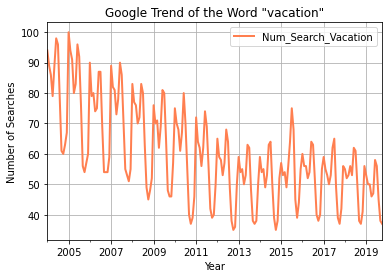

In [9]:
# Plot the time series of google searches of the word "vacation"
plt.style.use('seaborn-deep')
ax = vacation.plot(color='coral', grid=True, linewidth=2)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Searches')
ax.set_title('Google Trend of the Word "vacation"');

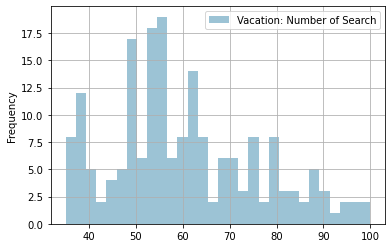

In [10]:
# Plot historgram (frequency of counts)
vacation.plot(kind='hist', bins=30, color='#9CC3D5FF', grid=True)
plt.legend(['Vacation: Number of Search']);

<AxesSubplot:ylabel='Density'>

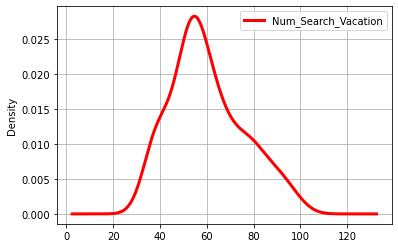

In [11]:
# Calculate kernel density plot
vacation.plot(kind='density', color="red", 
              grid=True, linewidth=3, fontsize=10)

A density plot shows the distribution of the data over a continuous interval. 
Kernel density plot smoothes out the noise in time series data.
The peaks of a density plot help display where values are concentrated over the interval.
A Kernel density plot is a a better way to display the distribution because it's not affected by the number of bins used (each bar used in a typical histogram).

# Example 2: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's Fremont Bridge. This data comes from an automated bicycle counter and can be downloaded as follows:

In [12]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [13]:
data = pd.read_csv('../datasets/FremontBridge.csv', index_col='Date', parse_dates=True)
data.sample(5)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2014-03-31 05:00:00,20.0,15.0,5.0
2019-02-06 19:00:00,31.0,5.0,26.0
2014-05-31 18:00:00,180.0,99.0,81.0
2014-08-13 17:00:00,499.0,147.0,352.0
2016-11-10 17:00:00,538.0,148.0,390.0


In [14]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [15]:
# For convenience, we'll further process the dataset by shortening the columns names:
data.columns = ['Total', 'West', 'East']
data.eval('West + East')

Date
2019-11-01 00:00:00     12.0
2019-11-01 01:00:00      7.0
2019-11-01 02:00:00      1.0
2019-11-01 03:00:00      6.0
2019-11-01 04:00:00      6.0
                       ...  
2021-04-30 19:00:00    139.0
2021-04-30 20:00:00     65.0
2021-04-30 21:00:00     34.0
2021-04-30 22:00:00     34.0
2021-04-30 23:00:00     36.0
Length: 141422, dtype: float64

In [16]:
data.describe()

,Total,West,East
count,141400.000000,141400.00000,141400.000000
mean,111.169434,50.61628,60.553154
std,141.999671,65.46336,88.279627
min,0.000000,0.00000,0.000000
25%,14.000000,6.00000,7.000000
50%,60.000000,28.00000,30.000000
75%,145.000000,68.00000,74.000000
max,1097.000000,698.00000,850.000000


-----

## Visualizing the data

We can gain some insight into the dataset by visualizing it.

In [17]:
%matplotlib inline
import seaborn; seaborn.set()

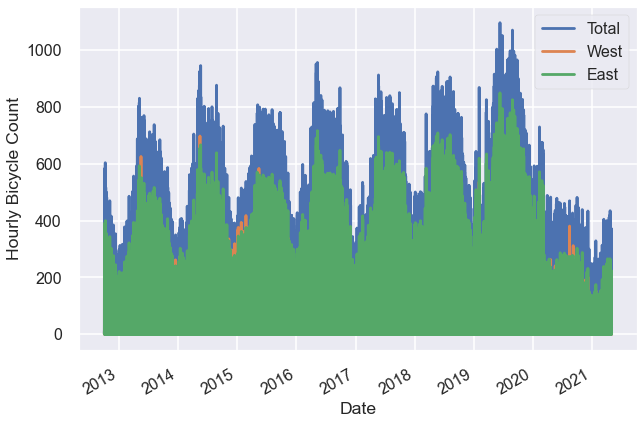

In [18]:
plt.style.use('seaborn-poster')
data.plot(figsize=(10,7))
plt.ylabel('Hourly Bicycle Count');

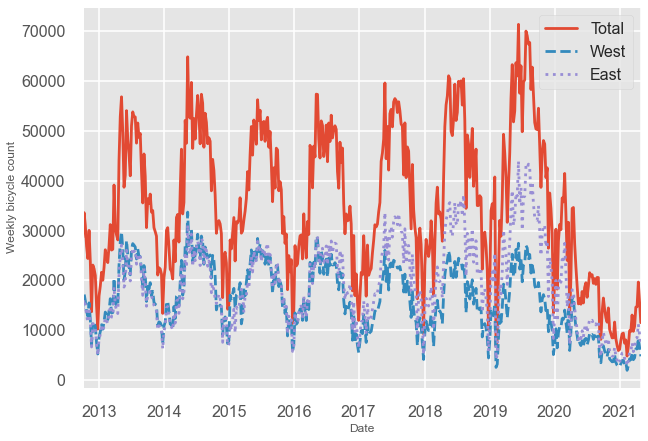

In [19]:
weekly = data.resample('W').sum()
plt.style.use('ggplot')
weekly.plot(style=['-', '--', ':'], figsize=(10,7))
plt.ylabel('Weekly bicycle count');

This shows us some interesting seasonal trends: 
* as you might expect, people bicycle more in the summer than in the winter, 
* within a particular season the bicycle use varies from week to week (likely dependent on weather)
* and the lockdown in summer of 2020, were we would expected an even growing trend.

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the `pd.rolling_mean()` function. Here we'll do a 30 day rolling mean of our data, making sure to center the window:


Text(0, 0.5, 'mean hourly count')

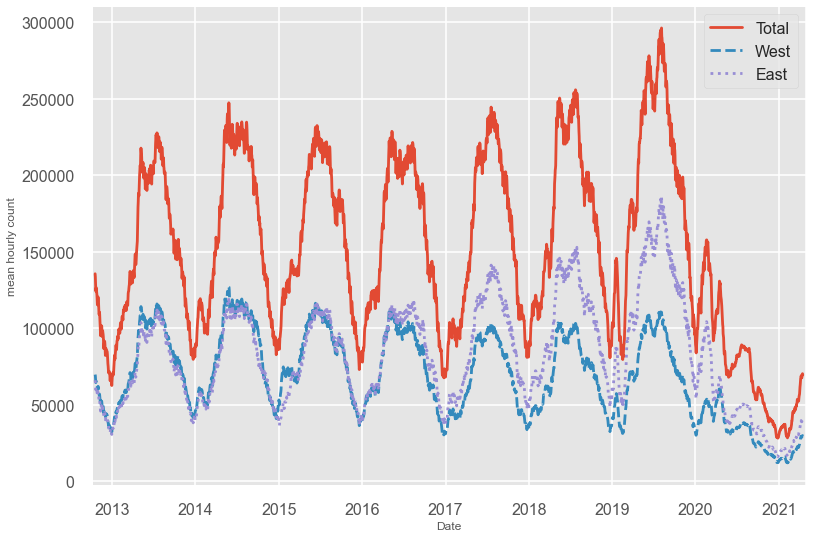

In [20]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', '--', ':'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window. The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

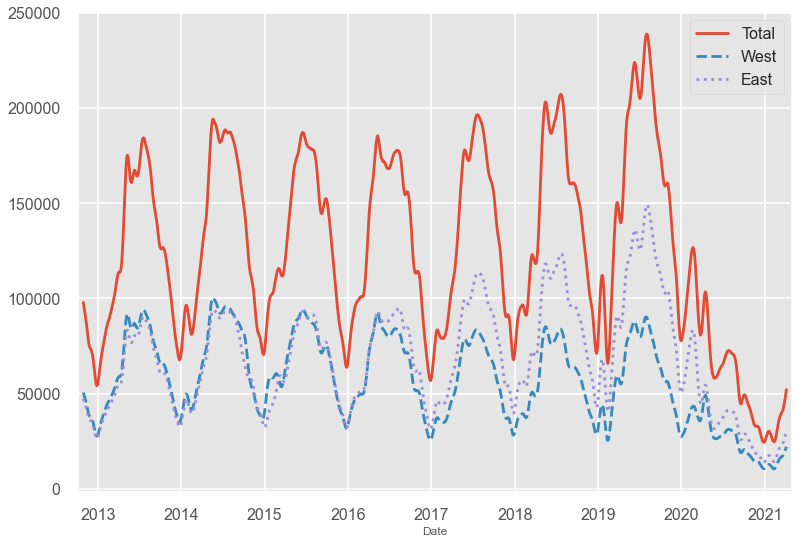

In [21]:
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=['-', '--', ':']);

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a functin of the time of day. We can do this using the GroupBy functionality:

<AxesSubplot:xlabel='time'>

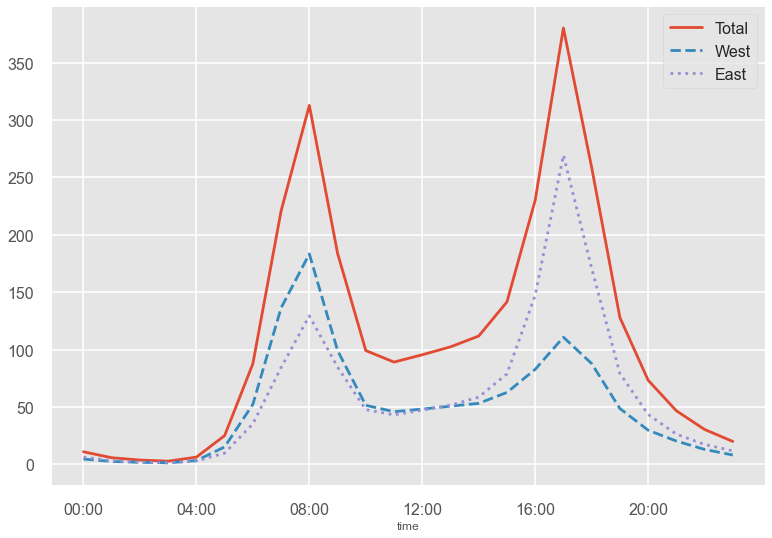

In [22]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', '--', ':'])

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We might be curious about how things change based on the day of the week. We can do this wi

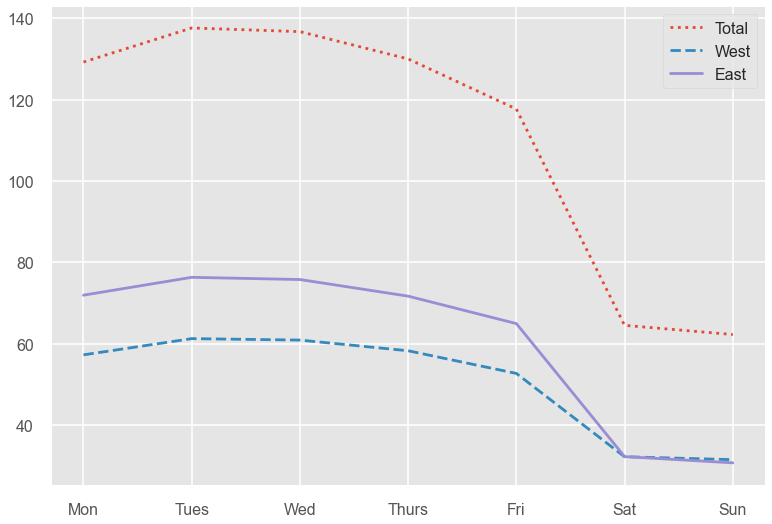

In [24]:

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.